## House Price Prediction Project

Data retrieved from: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
import matplotlib.pyplot as plt

Import data in pandas dataframe from a text file


In [2]:
# house_dataframe = pd.DataFrame()
house_dataframe = pd.DataFrame(columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRA","B","LSTA","MEDV"])
with open("../data/housing-data.txt", "r") as txt_file:
    for line in txt_file:
       split_line = line.split()
       split_line = [float(x) for x in split_line]
       house_dataframe.loc[len(house_dataframe)] = split_line
    #    house_dataframe =house_dataframe.add(split_line)
       

See the Created data

In [3]:
house_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    float64
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    float64
 9   TAX     506 non-null    float64
 10  PTRA    506 non-null    float64
 11  B       506 non-null    float64
 12  LSTA    506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


See Unique Counts

In [4]:
house_dataframe["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

DESCRIBE


In [5]:
house_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA,B,LSTA,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


See Housing Histogram

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRA'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTA'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

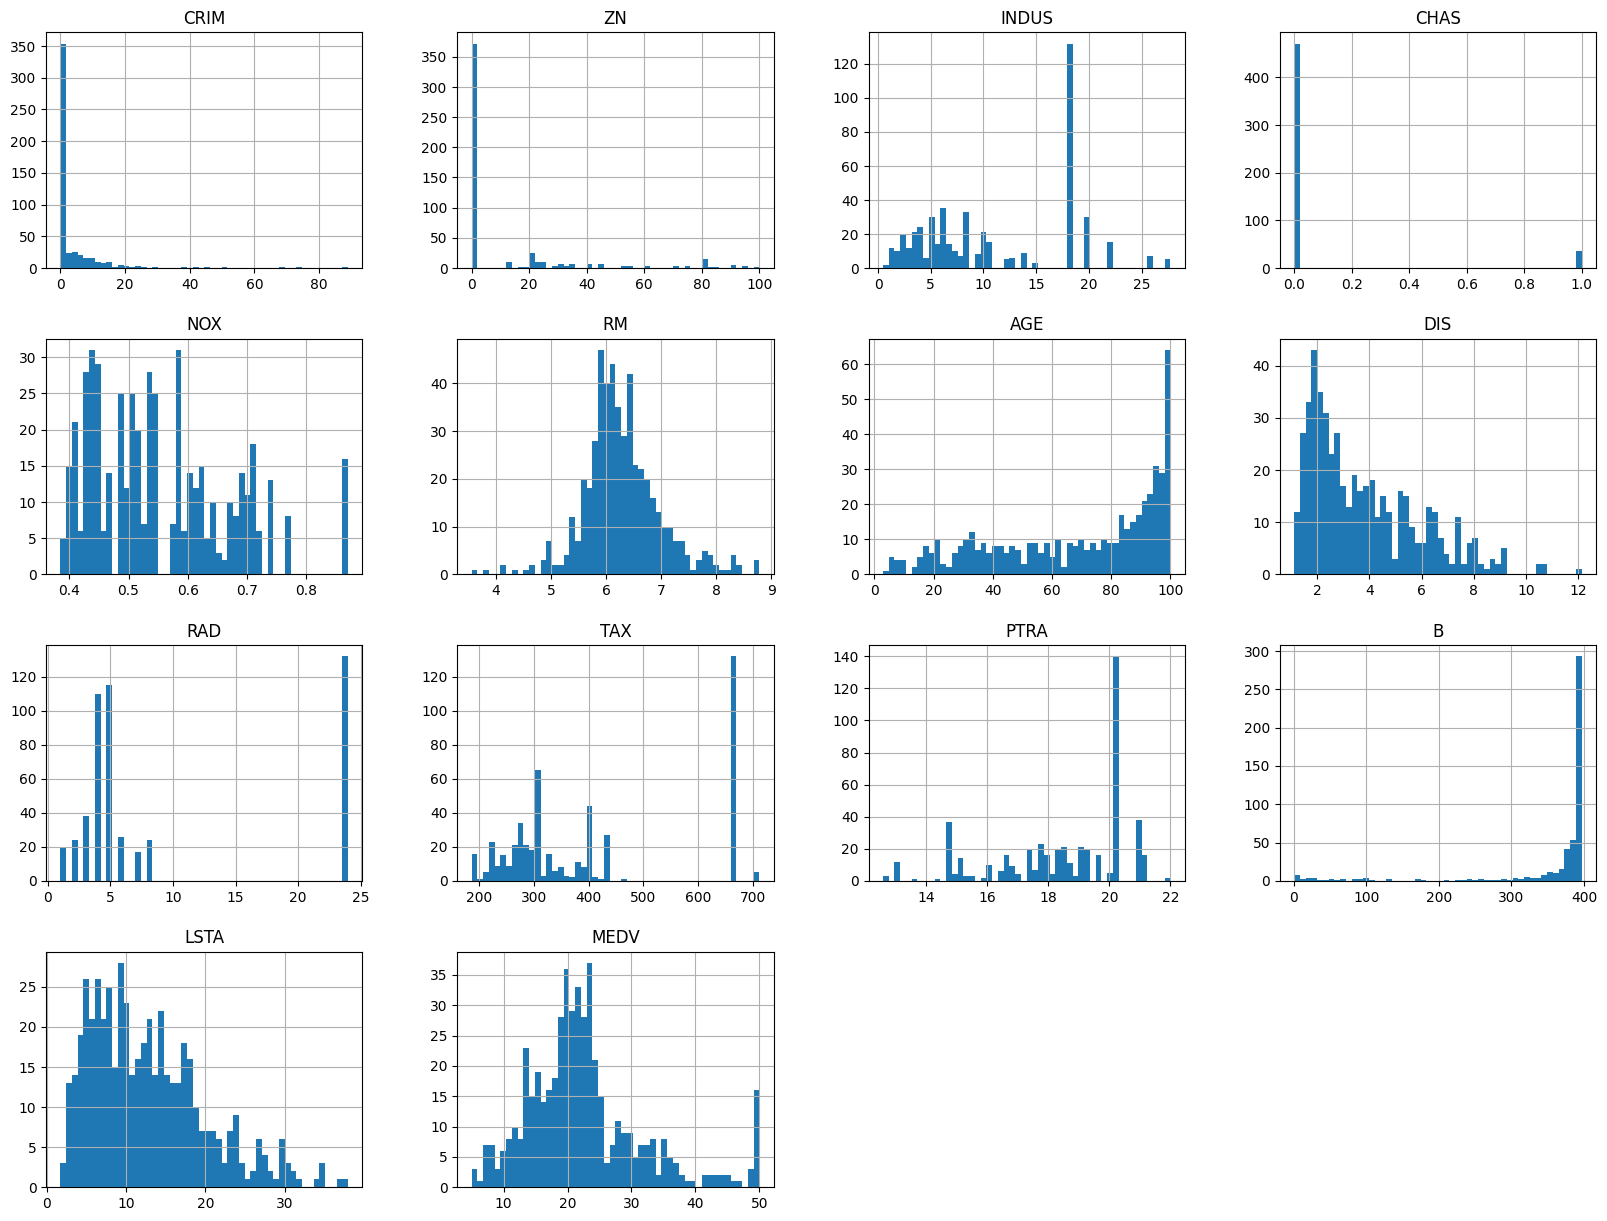

In [6]:
house_dataframe.hist(bins=50, figsize=(20,15))

### ML Implemetation Begins
Function to seperate train_set and test_set

In [7]:
def split_train_test(p_data_length,p_test_ratio):
    """
    Creates random Incices and splits them in bettween training and testing 
    """
    shuffled = np.random.permutation(p_data_length)
    test_indices = shuffled[0:int(p_test_ratio*p_data_length)]
    train_indices = shuffled[int(p_test_ratio*p_data_length):0]
    return test_indices,train_indices


Above Function implementation can be achieved by the Scikit Learn *train_test_split* function

In [8]:
train_indices,test_indices = train_test_split(house_dataframe,test_size=0.2,random_state=42)


#### From the Histogram plots notice *CHAS*. We need to ensure that we split the data evenly betweeen test and train so datapoints of CHAS with 0 and 1 get disctributed evenly

In [9]:
strat_shuffle = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_indices,test_indices in strat_shuffle.split(house_dataframe,house_dataframe['CHAS']):
    strat_train_set = house_dataframe.loc[train_indices]
    strat_test_set = house_dataframe.loc[test_indices]
strat_train_set['CHAS'].value_counts()

CHAS
0.0    376
1.0     28
Name: count, dtype: int64

In [10]:
strat_test_set['CHAS'].value_counts()

CHAS
0.0    95
1.0     7
Name: count, dtype: int64

## Looking for Correlation
tells us about the propotionaliy of each feature w.r.t the rest of the features


In [11]:
housing_corr_matrix = house_dataframe.corr()
housing_corr_matrix['MEDV'].sort_values(ascending=False)

MEDV     1.000000
RM       0.695360
ZN       0.360445
B        0.333461
DIS      0.249929
CHAS     0.175260
AGE     -0.376955
RAD     -0.381626
CRIM    -0.388305
NOX     -0.427321
TAX     -0.468536
INDUS   -0.483725
PTRA    -0.507787
LSTA    -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTA', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTA', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTA'>,
        <Axes: xlabel='RM', ylabel='LSTA'>,
        <Axes: xlabel='LSTA', ylabel='LSTA'>]], dtype=object)

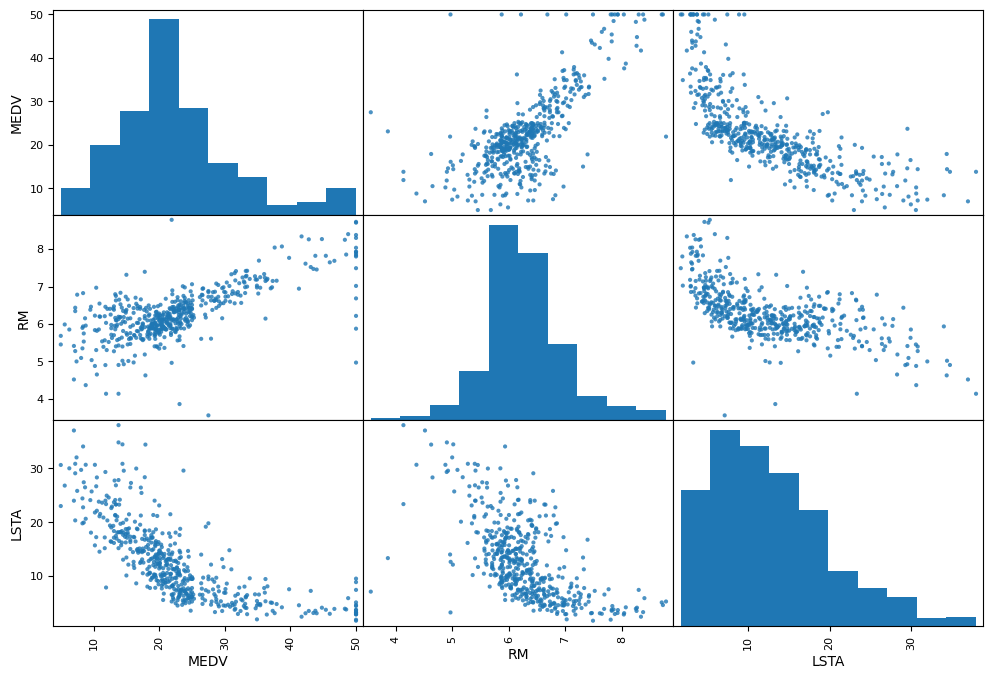

In [12]:
attributes = ["MEDV","RM","LSTA"]
scatter_matrix(house_dataframe[attributes],figsize=(12,8),alpha=0.8)

<Axes: xlabel='RM', ylabel='MEDV'>

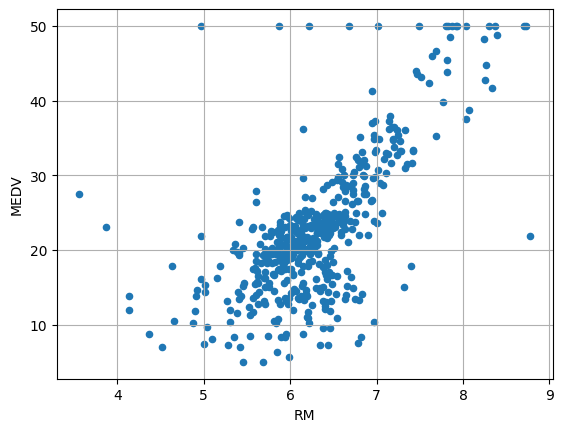

In [13]:
house_dataframe.plot(kind='scatter',x= 'RM',y = 'MEDV',grid=True)